In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_LAB
from package_LAB import *
import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

# PID_RT

(0.0, 50.0)

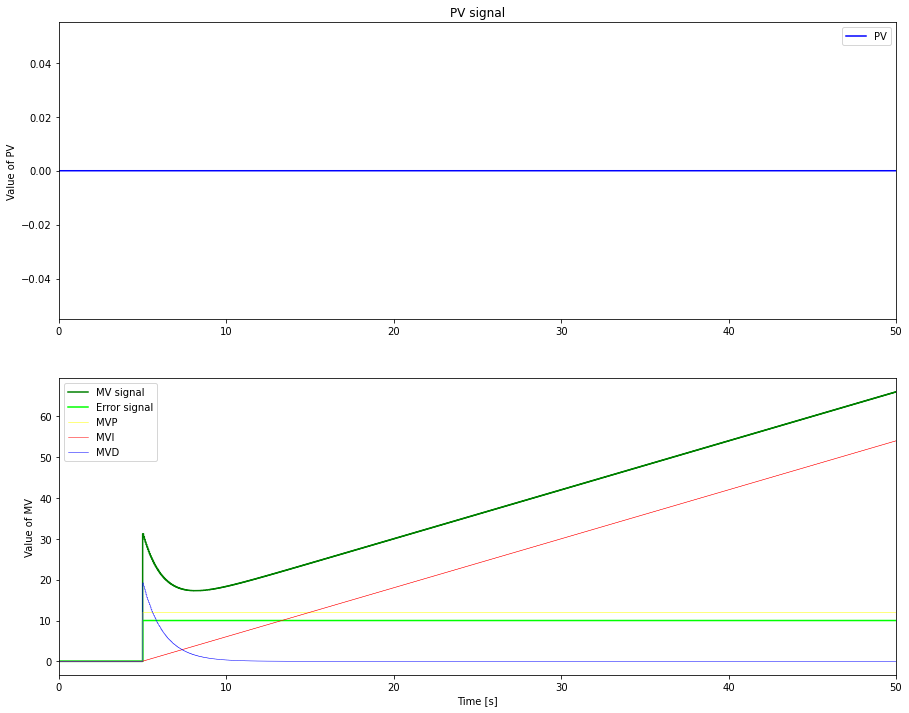

In [2]:
TSim = 50
Ts = 0.05
N = int(TSim/Ts) + 1

# Path for PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0}

t = []

SP = []
PV = []
Man = 0
MVMan = []
MVFF = []

Kc = 1.2
Ti = 10
Td = 2
alpha = 0.6

MVMin = -100
MVMax = 100

MV = []
MVP = []
MVI = []
MVD = []
E = []

ManFF = 0
PVInit = 0


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    #FO_RT(MV,Kp,T,Ts,PV,PVInit=0,method='EBD')
    
plt.figure(figsize = (15,12))

plt.subplot(2,1,1)
plt.step(t,PV,'b-',label='PV',where='post')
#plt.step(t,PVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of PV')
plt.title('PV signal')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MV,'g-',label='MV signal',where='post')
plt.step(t,E,'lime',label='Error signal',where='post')
plt.step(t,MVP,'yellow',label='MVP',where='post',linewidth=0.5)
plt.step(t,MVI,'red',label='MVI',where='post',linewidth=0.5)
plt.step(t,MVD,'blue',label='MVD',where='post',linewidth=0.5)
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])